<a href="https://colab.research.google.com/github/manyamutyala/Plant-leaf-disease-detection/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Leaves Data

/content/drive/MyDrive/Leaves Data


In [4]:
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)


In [5]:
train=train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Leaves Data/train",target_size=(256,256),batch_size=32)
val=val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Leaves Data/valid",target_size=(256,256),batch_size=32)



Found 1282 images belonging to 8 classes.
Found 978 images belonging to 8 classes.


In [6]:
t_img,label=train.next()

In [7]:
t_img.shape

(32, 256, 256, 3)

In [8]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize = (5, 5))
    plt.imshow(im)
    plt.show()

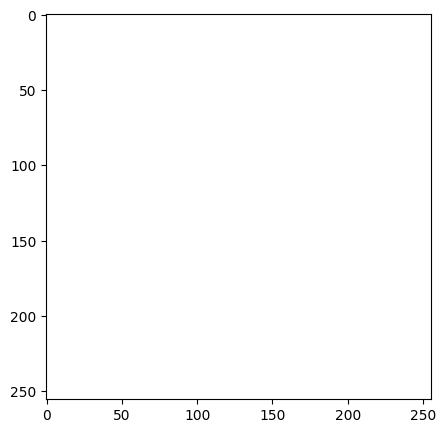

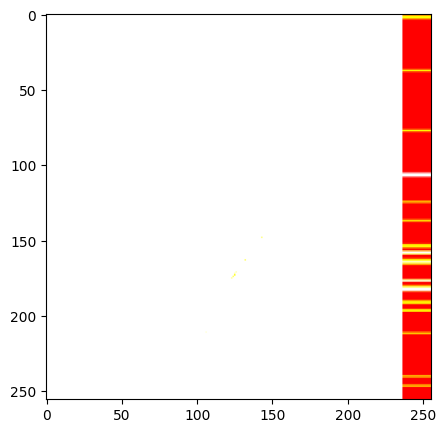

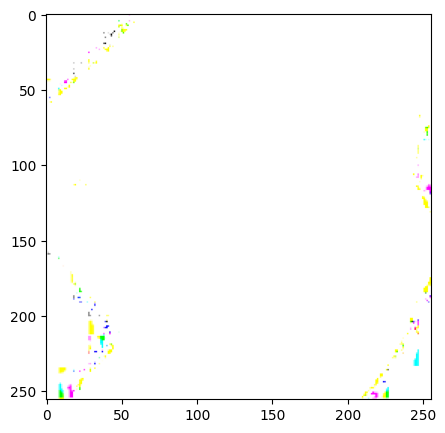

In [9]:
plotImage(t_img[:3],label[:3])

In [10]:
!pip install keras
from keras.layers import Dense,Flatten
from keras.models import Model
from tensorflow.keras.applications import VGG19 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:

base_model = VGG19(input_shape = (256, 256, 3), include_top = False)


80134624/80134624 [==============================] - 3s 0us/step


In [12]:
for layer in base_model.layers:
  layer.trainable = False


In [13]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
X=Flatten()(base_model.output)
X=Dense(units=8,activation='softmax')(X)



In [15]:
model=Model(base_model.input,X)


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [17]:
model.compile(optimizer='adam',loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
mc=ModelCheckpoint(filepath="/content/best_model.h5",
                   monitor='val_accuracy',
                   patience=3,
                   verbose=1,
                   save_best_only=True)
cb=[es,mc]

In [ ]:
his = model.fit_generator(train,
                        steps_per_epoch=16,
                        epochs = 10,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

<ipython-input-20-84f87942153a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 2.6213 - accuracy: 0.8945 
Epoch 1: val_accuracy improved from 0.82812 to 0.85938, saving model to /content/best_model.h5
16/16 [==============================] - 1116s 71s/step - loss: 2.6213 - accuracy: 0.8945 - val_loss: 2.9442 - val_accuracy: 0.8594
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 1.7736 - accuracy: 0.9199 
Epoch 2: val_accuracy did not improve from 0.85938
16/16 [==============================] - 1105s 71s/step - loss: 1.7736 - accuracy: 0.9199 - val_loss: 3.5722 - val_accuracy: 0.8105
Epoch 3/10
 7/16 [============>.................] - ETA: 4:51 - loss: 0.9899 - accuracy: 0.9420